**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "hic_intact_K562_ENCSR479XDG"
)
vec = dir(txt_fdiry)
print(vec)

[1] "fcc_astarr_macs_input_overlap.hic_intact_Loop_A_ENCSR479XDG.bed.gz"
[2] "fcc_astarr_macs_input_overlap.hic_intact_Loop_B_ENCSR479XDG.bed.gz"
[3] "fcc_astarr_macs_input_overlap.hic_intact_TAD_ENCSR479XDG.bed.gz"   


In [3]:
txt_region_folder_A = "fcc_astarr_macs"
txt_region_folder_B = "hic_intact_K562_ENCSR479XDG"

txt_fdiry = file.path(FD_RES, "region", txt_region_folder_A, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)
dat_cname = read_tsv(txt_fpath, show_col_types = FALSE)
vec_txt_cname_A = dat_cname$Name

txt_fdiry = file.path(FD_RES, "region", txt_region_folder_B, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)
dat_cname = read_tsv(txt_fpath, show_col_types = FALSE)
vec_txt_cname_B = dat_cname$Name

vec_txt_cname = c(
    paste0(vec_txt_cname_A, "_A"),
    paste0(vec_txt_cname_B, "_B"),
    "Overlap"
)

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "hic_intact_K562_ENCSR479XDG"
)
txt_fname = "fcc_astarr_macs_input_overlap.hic_intact_TAD_ENCSR479XDG.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, col_names = vec_txt_cname)
dat_region_import = dat
print(dim(dat))
head(dat)

Rows: 66886 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Chrom_A, Chrom_B, Name_B, Group_B, Label_B
dbl (5): ChromStart_A, ChromEnd_A, ChromStart_B, ChromEnd_B, Overlap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 66886    10


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Name_B,Group_B,Label_B,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr1,1121812,1122517,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,705
chr1,1123051,1123418,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,367
chr1,1124365,1124875,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,510
chr1,1125359,1125597,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,238
chr1,1127573,1128245,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,672
chr1,1128708,1128988,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,280


In [5]:
###
dat = dat_region_import

###
vec = str_split(txt_fname, "\\.")[[1]]
txt_annot_A = vec[1]
txt_annot_B = vec[2]

###
dat = dat %>% 
    dplyr::mutate(
        Region_A = paste0(Chrom_A, ":", ChromStart_A, "-", ChromEnd_A),
        Region_B = paste0(Chrom_B, ":", ChromStart_B, "-", ChromEnd_B),
        Annotation_A = txt_annot_A,
        Annotation_B = txt_annot_B
    )
dat_region_arrange = dat
print(dim(dat))
head(dat)

[1] 66886    14


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Name_B,Group_B,Label_B,Overlap,Region_A,Region_B,Annotation_A,Annotation_B
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1,1121812,1122517,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,705,chr1:1121812-1122517,chr1:1120000-1240000,fcc_astarr_macs_input_overlap,hic_intact_TAD_ENCSR479XDG
chr1,1123051,1123418,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,367,chr1:1123051-1123418,chr1:1120000-1240000,fcc_astarr_macs_input_overlap,hic_intact_TAD_ENCSR479XDG
chr1,1124365,1124875,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,510,chr1:1124365-1124875,chr1:1120000-1240000,fcc_astarr_macs_input_overlap,hic_intact_TAD_ENCSR479XDG
chr1,1125359,1125597,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,238,chr1:1125359-1125597,chr1:1120000-1240000,fcc_astarr_macs_input_overlap,hic_intact_TAD_ENCSR479XDG
chr1,1127573,1128245,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,672,chr1:1127573-1128245,chr1:1120000-1240000,fcc_astarr_macs_input_overlap,hic_intact_TAD_ENCSR479XDG
chr1,1128708,1128988,chr1,1120000,1240000,chr1:1120000-1240000,hic_intact,TAD,280,chr1:1128708-1128988,chr1:1120000-1240000,fcc_astarr_macs_input_overlap,hic_intact_TAD_ENCSR479XDG


In [6]:
dat = dat_region_arrange
dat = dat %>% 
    dplyr::select(
        Chrom_A, ChromStart_A, ChromEnd_A, 
        Chrom_B, ChromStart_B, ChromEnd_B, 
        Region_A, Region_B) %>% 
    dplyr::distinct()

dat_region_simplify = dat
print(dim(dat))
head(dat)

[1] 66886     8


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Region_A,Region_B
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,1121812,1122517,chr1,1120000,1240000,chr1:1121812-1122517,chr1:1120000-1240000
chr1,1123051,1123418,chr1,1120000,1240000,chr1:1123051-1123418,chr1:1120000-1240000
chr1,1124365,1124875,chr1,1120000,1240000,chr1:1124365-1124875,chr1:1120000-1240000
chr1,1125359,1125597,chr1,1120000,1240000,chr1:1125359-1125597,chr1:1120000-1240000
chr1,1127573,1128245,chr1,1120000,1240000,chr1:1127573-1128245,chr1:1120000-1240000
chr1,1128708,1128988,chr1,1120000,1240000,chr1:1128708-1128988,chr1:1120000-1240000


In [7]:
dat = dat_region_simplify
length(unique(dat$Region_B))

[1] 4320

In [8]:
dat = dat_region_simplify
dat = dat %>% 
    dplyr::filter(Chrom_A == "chrX") %>% 
    dplyr::mutate(Value = 1) %>%
    dplyr::distinct() 
dat = dat %>%
    dplyr::arrange(Chrom_B, ChromStart_B, ChromEnd_B)
vec = unique(dat$Region_B)
dat = dat %>% dplyr::mutate(Region_B = factor(Region_B, levels=vec))

dat = dat %>%
    dplyr::arrange(Chrom_A, ChromStart_A, ChromEnd_A)
vec = unique(dat$Region_A)
dat = dat %>% dplyr::mutate(Region_A = factor(Region_A, levels=rev(vec)))

In [9]:
print(dim(dat))
head(dat, 3)

[1] 860   9


Chrom_A,ChromStart_A,ChromEnd_A,Chrom_B,ChromStart_B,ChromEnd_B,Region_A,Region_B,Value
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
chrX,8782989,8783613,chrX,8740000,8815000,chrX:8782989-8783613,chrX:8740000-8815000,1
chrX,10014495,10015522,chrX,10000000,10090000,chrX:10014495-10015522,chrX:1e+07-10090000,1
chrX,10047058,10047541,chrX,10000000,10090000,chrX:10047058-10047541,chrX:1e+07-10090000,1


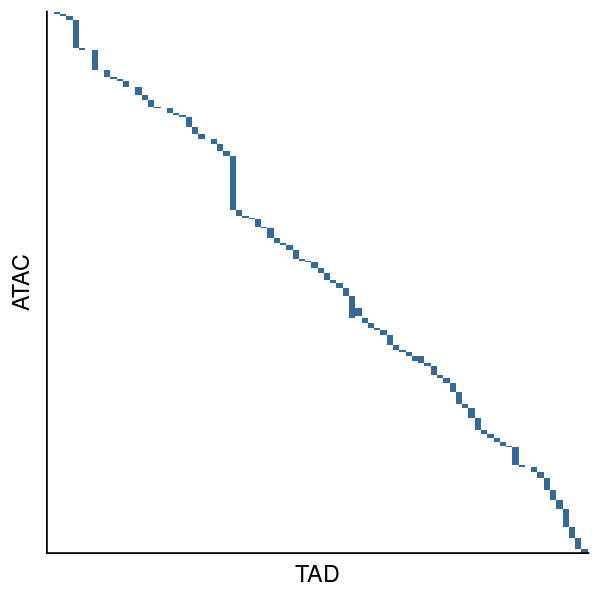

In [10]:
gpt = ggplot(dat, aes(x=Region_B, y=Region_A, fill=Value)) +
    geom_tile() + 
    labs(x="TAD", y="ATAC") +
    theme_cowplot() +
    theme(
        axis.text  = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "None"
    )

options(repr.plot.height = 5, repr.plot.width = 5)
print(gpt)